# **Air Quality UCI Data**

-----------------------------
## **Context**
-----------------------------
In this dataset, we will use the Airquality dataset which contains information on hourly air pollutants data from multiple cities.

-----------------------------
## **Objective**
-----------------------------

The objective of this project is to examine the dataset's structure, compute summary statistics, and visualize distributions. I will develop hypotheseses based on the observed data patterns and relationships. I will employ statistical test and visual method to examine my hypothesis and discuss the outcomes. Finally we will clearly state whether the data supports or refutes my hypothesis.

-----------------------------
## **Dataset**
-----------------------------

The Air Quality dataset contains information on various hourly average concentration of different gasses, sensors for each gas, temoeraature humidity and absolute humidity in the italy from October 3, 2004 to April 4, 2005. It contains the following features:

- Date	Date of data collection (DD/MM/YYYY format).
- Time	Time of data collection (HH.MM.SS format).
- CO(GT)	True hourly averaged concentration of Carbon Monoxide (CO) in mg/m³
- PT08.S1(CO)	Sensor 1 output related to CO concentration (in arbitrary
  units).
- NMHC(GT)	True hourly averaged concentration of Non-Methane Hydrocarbons
  (NMHC) in µg/m³ (GT).
- C6H6(GT)	True hourly averaged concentration of Benzene (C6H6) in µg/m³
  (GT).
- PT08.S2(NMHC)	Sensor 2 output related to NMHC concentration (in arbitrary
  units).
- NOx(GT)	True hourly averaged concentration of Nitrogen Oxides (NOx) in ppb
  (GT).
- PT08.S3(NOx)	Sensor 3 output related to NOx concentration (in arbitrary
  units).
- NO2(GT)	True hourly averaged concentration of Nitrogen Dioxide (NO2) in µg/
  m³ (GT).
- PT08.S4(NO2)	Sensor 4 output related to NO2 concentration (in arbitrary
  units).
- PT08.S5(O3)	Sensor 5 output related to Ozone (O3) concentration (in
  arbitrary units).
- T	Ambient Temperature in °C.
- RH	Relative Humidity in %.
- AH	Absolute Humidity in g/m³.

In [ ]:
#EDA, hypothesis testing, and conclusion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 ## **Loading Data**

In [ ]:
data = pd.read_csv('AirQualityUCI.csv', sep=';')

In [ ]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


**Observations:**
- There are **9357 observations and 16 columns** in the dataset
- All columns have **no missing values**, meaning there are 9357 non-null values
- Date, Time, CO(GT), C6H6(GT), Temperature, Humidity, and Absolute Humidity are all of **object** type.
- PT08.S1(CO), NMHC(GT), PT08.S2(NMHC), PT08.S3(N0x), PT08.S4(N02), PT08.S5(03) are **float64** values.


## **Exploratory Data Analysis**

Change the commas to decimals for values and replace negative values with 0

In [ ]:
data = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',') # Changed the decimal separator here

data = data.replace(to_replace=',', value='.', regex=True) #replace negative values with 0
data = data.apply(pd.to_numeric, errors='coerce')
data = data.clip(lower=0)
data.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,NaN,NaN,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,NaN,NaN,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,NaN,NaN,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,NaN,NaN,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,NaN,NaN,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


 Since all the columns have different values we do not drop any of the columns. We do drop the empty columns 15 and 16 which have no values. We also drop the object data since they are not numerical and cannot be computed. I also dropped the sensors since they would not be used in my hypothesis.



In [ ]:
data = data.drop(data.columns[[15,16]], axis=1)

In [ ]:
data = data.drop(columns=['Date', 'Time' ])

## **Summary Statistics**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),9357.0,1.765545,1.554264,0.0,0.6000,1.5000,2.6000,11.900
PT08.S1(CO),9357.0,1056.813081,301.246318,0.0,921.0000,1053.0000,1221.0000,2040.000
NMHC(GT),9357.0,21.373731,91.103489,0.0,0.0000,0.0000,0.0000,1189.000
C6H6(GT),9357.0,9.688704,7.559785,0.0,4.0000,7.9000,13.6000,63.700
PT08.S2(NMHC),9357.0,902.418296,318.696890,0.0,711.0000,895.0000,1105.0000,2214.000
NOx(GT),9357.0,203.649567,214.993187,0.0,50.0000,141.0000,284.0000,1479.000
PT08.S3(NOx),9357.0,802.813188,299.356129,0.0,637.0000,794.0000,960.0000,2683.000
NO2(GT),9357.0,93.245592,61.479820,0.0,53.0000,96.0000,133.0000,340.000
PT08.S4(NO2),9357.0,1399.302661,441.458774,0.0,1185.0000,1446.0000,1662.0000,2775.000
PT08.S5(O3),9357.0,982.895052,438.074058,0.0,700.0000,942.0000,1255.0000,2523.000


# **Visualize Distributions**

**We will visualize the distribution for temperature, Absolute humidity, and Relative Humidity.**

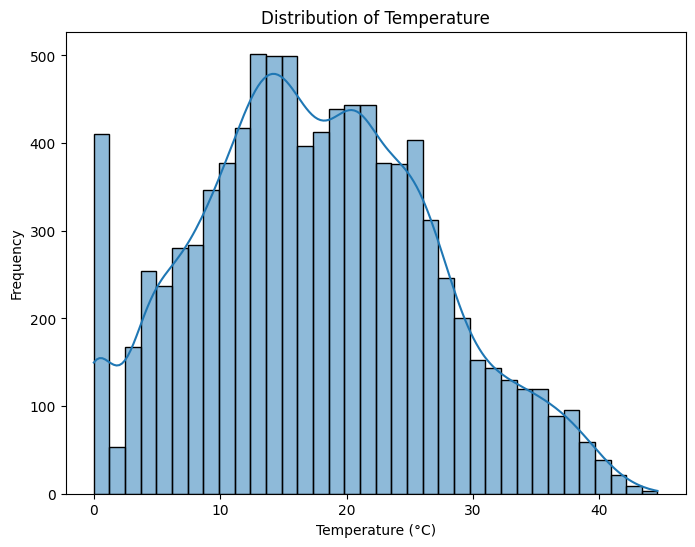

In [ ]:
# Visualize the distribution of temperature
plt.figure(figsize=(8, 6))
sns.histplot(data['T'], kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

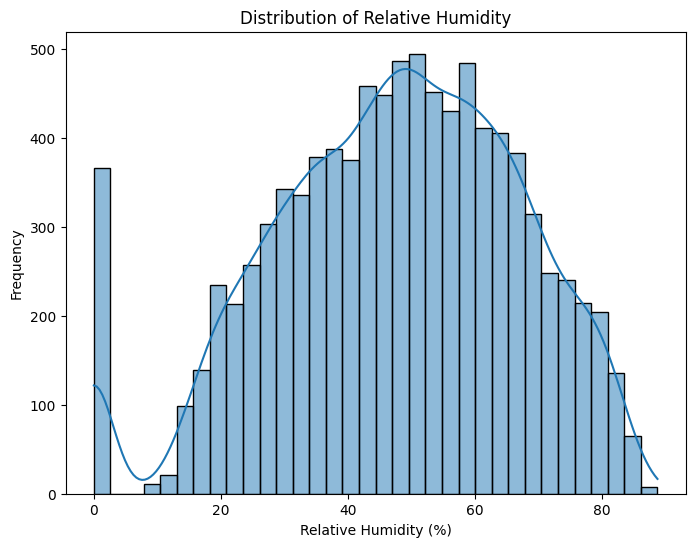

In [ ]:
# Visualize the distribution of Relative Humidity
plt.figure(figsize=(8, 6))
sns.histplot(data['RH'], kde=True)
plt.title('Distribution of Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.show()

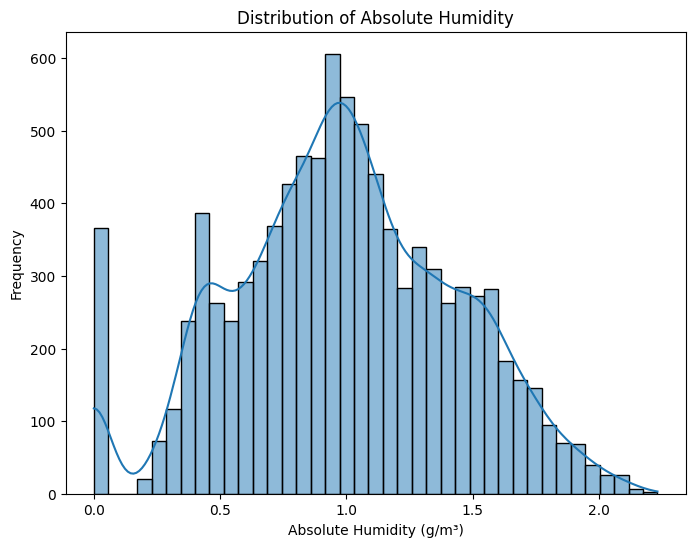

In [ ]:
# Visualize the distribution of Absolute Humidity
plt.figure(figsize=(8, 6))
sns.histplot(data['AH'], kde=True)
plt.title('Distribution of Absolute Humidity')
plt.xlabel('Absolute Humidity (g/m³)')
plt.ylabel('Frequency')
plt.show()

**We will show comparisons between Temperature, Relative and Absolute Humidity using scatter plots.**

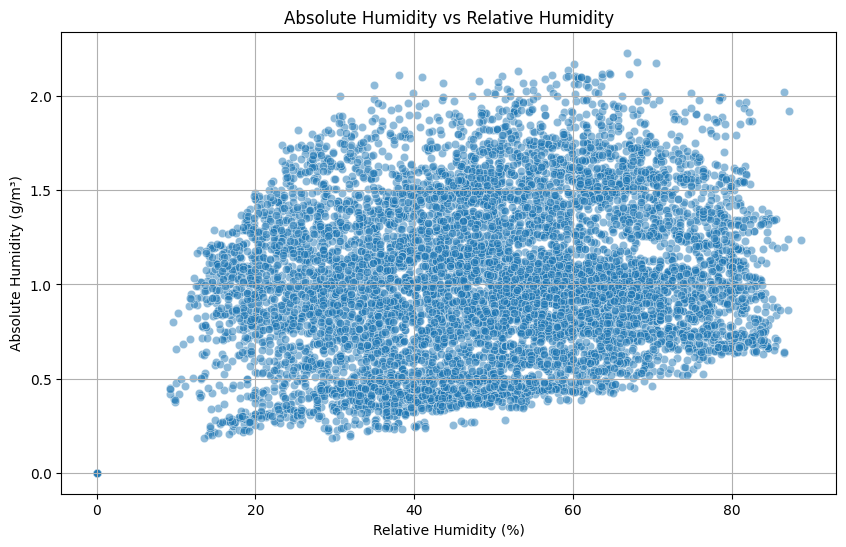

In [ ]:
# Plot: Absolute Humidity vs Relative Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='RH', y='AH', alpha=0.5)
plt.title('Absolute Humidity vs Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Absolute Humidity (g/m³)')
plt.grid(True)
plt.show()

**Observations**
- This shows that Relative Humidity is a function of Absolute Humidity and temperature.
- You can have the same AH, but different RH at different temperatures.



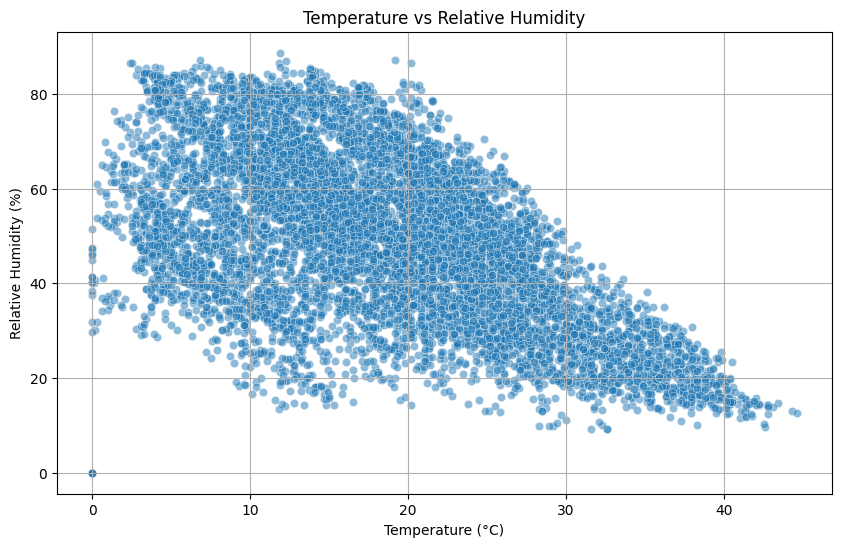

In [ ]:
# Plot: Temperature vs Relative Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='T', y='RH', alpha=0.5)
plt.title('Temperature vs Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.grid(True)
plt.show()

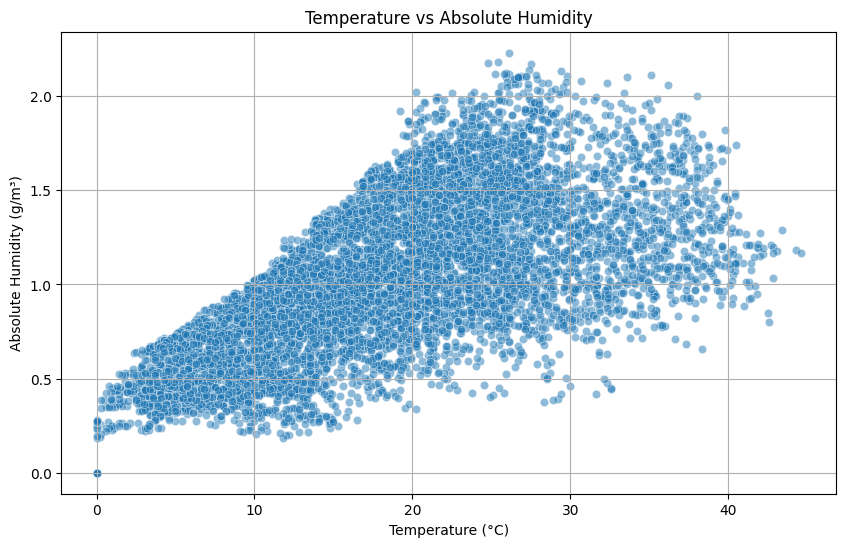

In [ ]:
# Plot: Temperature vs Absolute Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='T', y='AH', alpha=0.5)
plt.title('Temperature vs Absolute Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Absolute Humidity (g/m³)')
plt.grid(True)
plt.show()

In [ ]:
# Correlation Matrix
correlation = data[['T', 'RH', 'AH']].corr()
correlation

,T,RH,AH
T,1.000000,-0.28067,0.712994
RH,-0.280670,1.00000,0.350840
AH,0.712994,0.35084,1.000000


**Observations**

- T and RH have a negative correlation. As temperature increases, Relative humidity tends to decrease. This makes sense because warm air can hold more moisture, so the RH goes down when the air heats up.

- T and AH have a strong positive correlation. The higher temperature is associated with higher absolute humidity. Since warm air can hold more actual water vapor, AH tends to increase with T.

- RH and AH have a moderate positive correlation. This means as humidity increases, Absolute Humidity also increases. The relationship is not strong because temperature add variability to RH.

This represents the percentages of moisture in the air relative to the maximum moisture the air is able to hold at a given temperature. This is a representation of the total mass of water vapor present in a given volume of air. This means that if the temperature rises, the RH would drop since the air can hold more moisture, but the AH would be constant or increase.

# **Comparing the Ground Truth values for each concentration of gasses to the Sensor Reading**

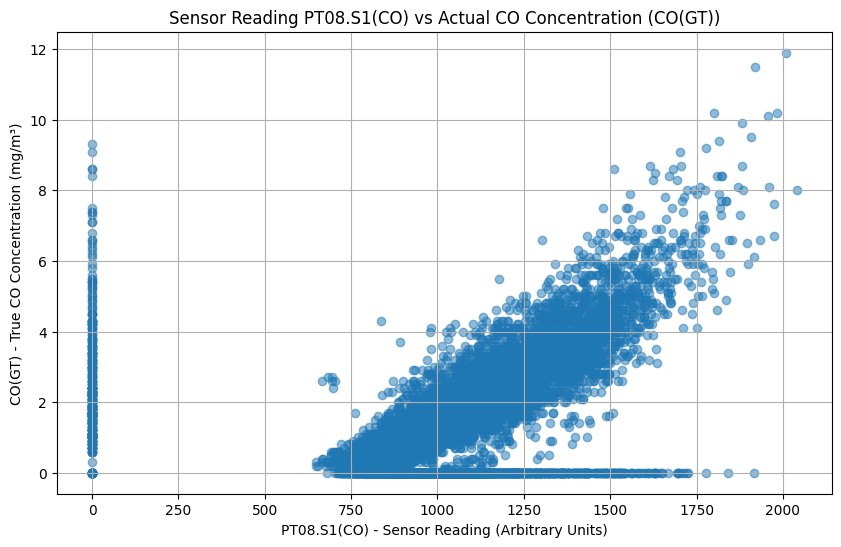

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['PT08.S1(CO)'], data['CO(GT)'], alpha=0.5)
plt.title('Sensor Reading PT08.S1(CO) vs Actual CO Concentration (CO(GT))')
plt.xlabel('PT08.S1(CO) - Sensor Reading (Arbitrary Units)')
plt.ylabel('CO(GT) - True CO Concentration (mg/m³)')
plt.grid(True)
plt.show()


**Observations**

- There is a positive correlation between the sensor and the ground truth values for CO(GT). This means that as the sensor values increase the actual values also increase.

- Since there is not a one to one mapping and there is noise along the trend line, we can assume the sensor data may be affected by temperature, humidity or other gasses.

- Both AH and RH affect sensor performance and Air pollutant levels.
- Weather conditions can change pollutant dispersion, so understanding this humidity structure is useful in air quality modeling.

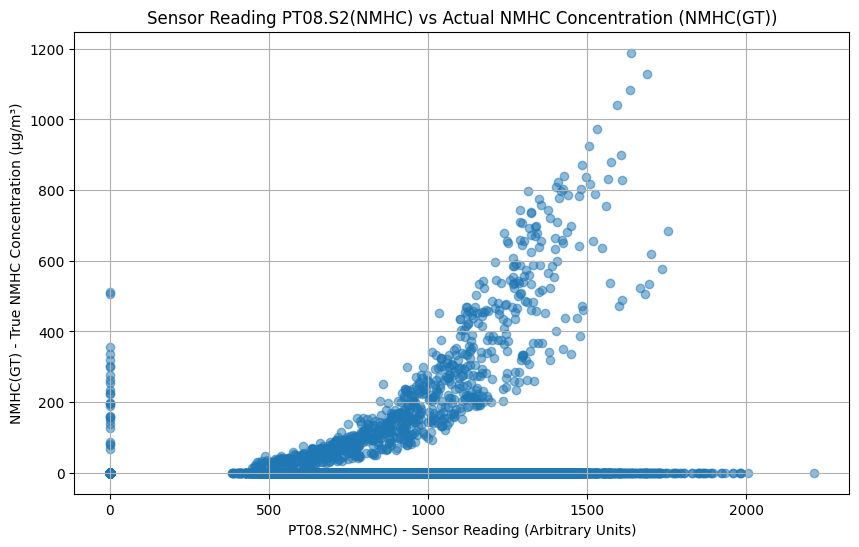

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['PT08.S2(NMHC)'], data['NMHC(GT)'], alpha=0.5)
plt.title('Sensor Reading PT08.S2(NMHC) vs Actual NMHC Concentration (NMHC(GT))')
plt.xlabel('PT08.S2(NMHC) - Sensor Reading (Arbitrary Units)')
plt.ylabel('NMHC(GT) - True NMHC Concentration (µg/m³)')
plt.grid(True)
plt.show()

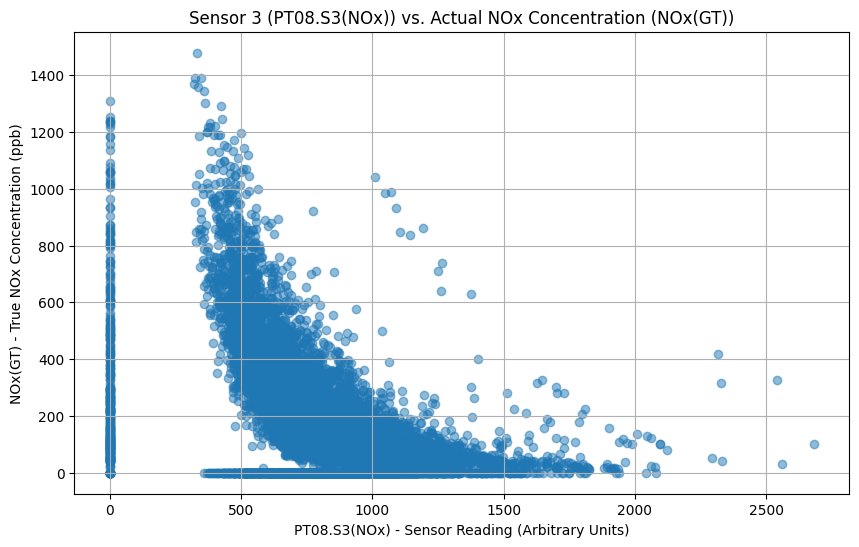

Correlation between Sensor 3 and NOx(GT): -0.5146018279782107


In [ ]:
# Plot Sensor 3 (NOx) vs. NOx(GT)
plt.figure(figsize=(10, 6))
plt.scatter(data['PT08.S3(NOx)'], data['NOx(GT)'], alpha=0.5)
plt.title('Sensor 3 (PT08.S3(NOx)) vs. Actual NOx Concentration (NOx(GT))')
plt.xlabel('PT08.S3(NOx) - Sensor Reading (Arbitrary Units)')
plt.ylabel('NOx(GT) - True NOx Concentration (ppb)')
plt.grid(True)
plt.show()

# Calculate the correlation between PT08.S3(NOx) and NOx(GT)
correlation_sensor3 = data['PT08.S3(NOx)'].corr(data['NOx(GT)'])
print(f"Correlation between Sensor 3 and NOx(GT): {correlation_sensor3}")

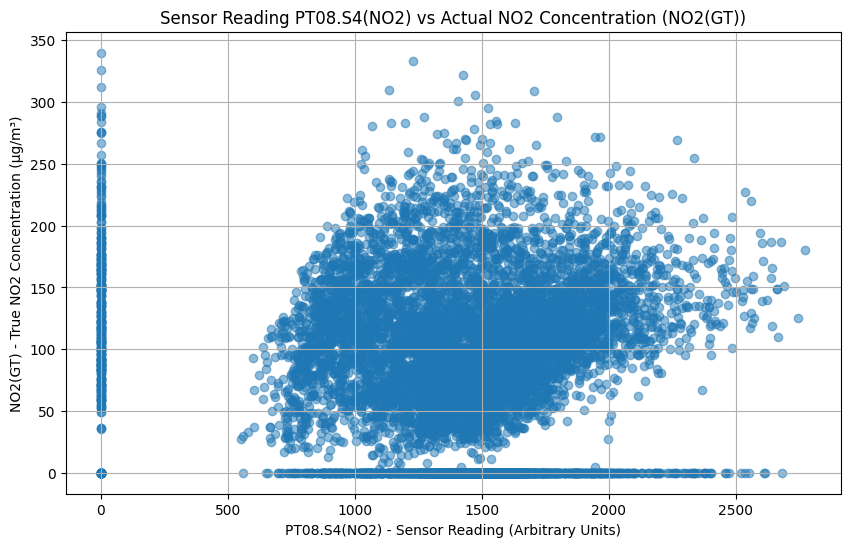

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['PT08.S4(NO2)'], data['NO2(GT)'], alpha=0.5)
plt.title('Sensor Reading PT08.S4(NO2) vs Actual NO2 Concentration (NO2(GT))')
plt.xlabel('PT08.S4(NO2) - Sensor Reading (Arbitrary Units)')
plt.ylabel('NO2(GT) - True NO2 Concentration (µg/m³)')
plt.grid(True)
plt.show()

# HeatMap Correlation of Variables

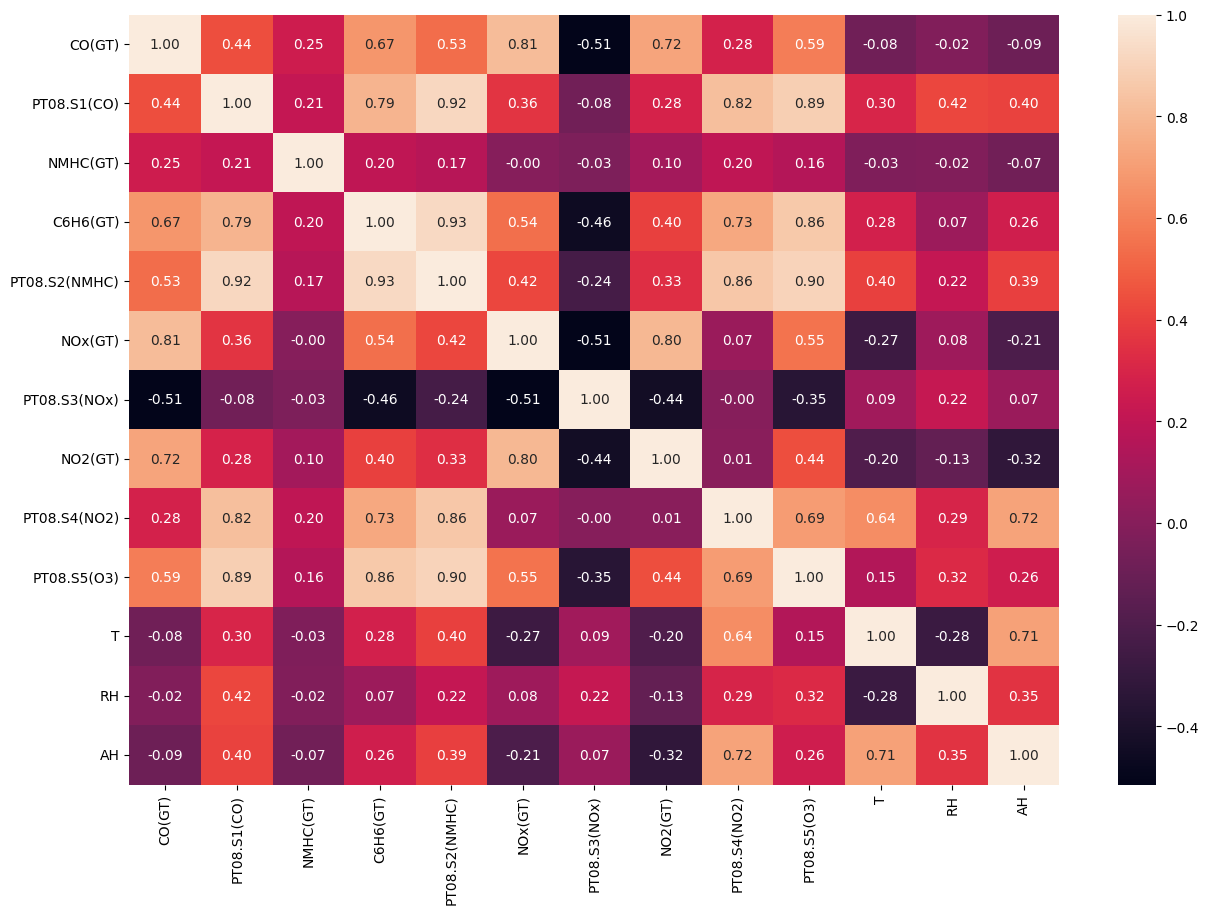

In [ ]:
plt.figure(figsize = (15, 10))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

plt.show()

We avoid using sensor 5 since the concentration of the Ground truth for O3 is not given.

In [ ]:
plt.figure(figsize = (15, 10))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

plt.show()

## **Hypothesis Formulation**

From the scatter plots above I can formulate the following hypothesis

# **Hypothesis 1**


- Higher Temperature has an impact in the readings for sensor 1.

# **Hypothesis 2**

- Higher Relative Humidity has an impact in the readings for sensor 1

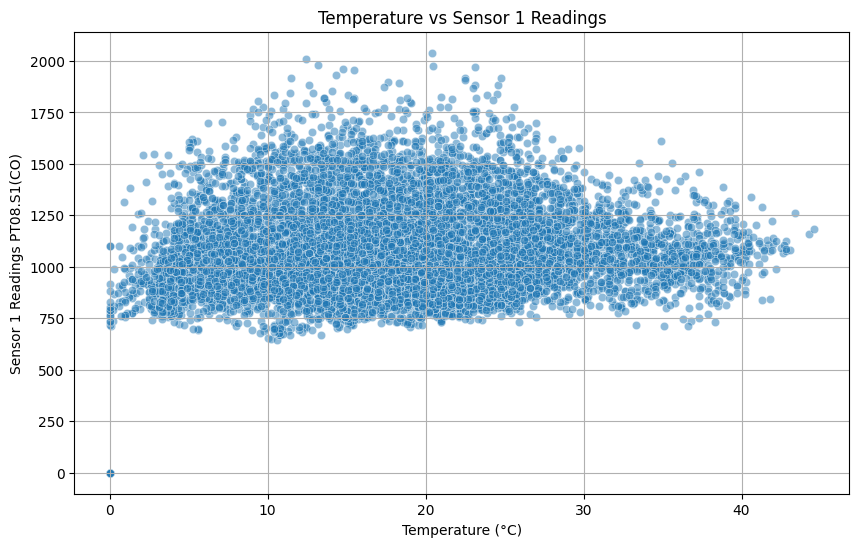

In [ ]:
# Plot Temperature vs PT08.S1(CO)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='T', y='PT08.S1(CO)', alpha=0.5)
plt.title('Temperature vs Sensor 1 Readings')
plt.xlabel('Temperature (°C)')
plt.ylabel('Sensor 1 Readings PT08.S1(CO)')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import ttest_ind
# Separate data based on temperature
temp_threshold = data['T'].median() # use median as a threshold
high_temp_group = data[data['T'] > temp_threshold]
low_temp_group = data[data['T'] <= temp_threshold]

# Perform t-test on sensor 1 readings for the two temperature groups
t_statistic, p_value = ttest_ind(high_temp_group['PT08.S1(CO)'], low_temp_group['PT08.S1(CO)'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Hypothesis 1:  Reject the null hypothesis. Temperature significantly impacts sensor 1 readings.")
else:
    print("Hypothesis 1: Fail to reject the null hypothesis. No significant impact of temperature on sensor 1 readings.")


T-statistic: 16.948605664308577
P-value: 1.7365585257764488e-63
Hypothesis 1:  Reject the null hypothesis. Temperature significantly impacts sensor 1 readings.


# **Result and Analysis of Hypothesis 1**

# Hypotheses


- H₀ (Null Hypothesis):
There is no significant correlation between Sensor 1 readings (PT08.S1(CO)) and Temperature.
  - if p < alpha, the Temperature significantly impact the sensor 1 readings.

- H₁ (Alternative Hypothesis):
There is a significant correlation between Sensor 1 readings (PT08.S1(CO)) and Temperature.
   - if p > alpha, there is no significant impact of temperature on sensor 1 readings.

# **Results**

- T-statistic: 16.948605664308577
  - The t-statistic is significantly larger that the critical value of 2 which is about 95% confidence interval so we would reject the null hypothesis.


- P-value: 1.7365585257764488e-63
  - The p-value is much less than 0.05, so we reject the null hypothesis meaning that sensor is impacted by temperature.

- Scatter Plot:
  - The scatter plot of 'Temperature' vs 'Sensor 1' indicates that temperature there is a moderate correlation between the variables.

# **Hypothesis 1 Conclusion**

This is based on the results of the T - test

  - There is a moderate correlation between temperature and sensor readings.
  - The temperature has a high impact on sensor readings supporting the alternative hypothesis.


# **Testing Hypothesis 2:**

**Hypothesis 2**

- Higher Relative Humidity has an impact in the readings for sensor 1



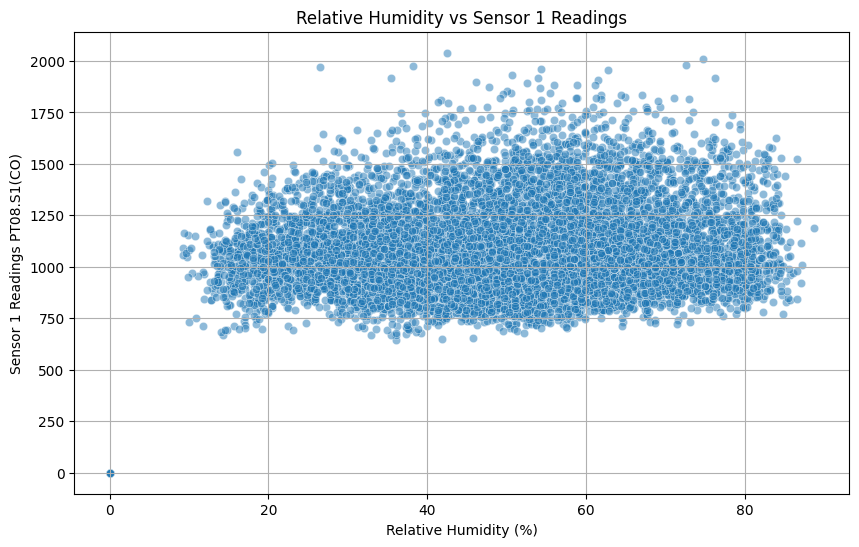

In [ ]:
# Plot Relative Humidity vs PT08.S1(CO)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='RH', y='PT08.S1(CO)', alpha=0.5)
plt.title('Relative Humidity vs Sensor 1 Readings')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Sensor 1 Readings PT08.S1(CO)')
plt.grid(True)
plt.show()

In [ ]:
# Separate data based on relative humidity
rh_threshold = data['RH'].median()  # Use median as a threshold
high_rh_group = data[data['RH'] > rh_threshold]
low_rh_group = data[data['RH'] <= rh_threshold]

# Perform t-test
t_statistic, p_value = ttest_ind(high_rh_group['PT08.S1(CO)'], low_rh_group['PT08.S1(CO)'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Hypothesis 2: Reject the null hypothesis. Relative Humidity significantly impacts sensor 1 readings.")
else:
    print("Hypothesis 2: Fail to reject the null hypothesis. No significant impact of Relative Humidity on sensor 1 readings.")


T-statistic: 21.942511803776714
P-value: 4.183075374651049e-104
Hypothesis 2: Reject the null hypothesis. Relative Humidity significantly impacts sensor 1 readings.


# **Result and Analysis of Hypothesis 2**

# Hypotheses


- H₀ (Null Hypothesis):
There is no significant correlation between Sensor 1 readings (PT08.S1(CO)) and Humidity.
  - if p < alpha, the Humidity significantly impact the sensor 1 readings.

- H₁ (Alternative Hypothesis):
There is a significant correlation between Sensor 1 readings (PT08.S1(CO)) and Humidity.
   - if p > alpha, there is no significant impact of humidity on sensor 1 readings.

# **Results**

- T-statistic: 21.942511803776714
  - The t-statistic is significantly larger that the critical value of 2 which is about 95% confidence interval so we would reject the null hypothesis.
  

- P-value: 4.183075374651049e-104
  - The p-value is much less than 0.05, so we reject the null hypothesis meaning that sensor is impacted by temperature.

- Scatter Plot:
  - The scatter plot of 'Humidity' vs 'Sensor 1' indicates that temperature there is a moderate correlation between the variables.



# **Hypothesis 2 Conclusion**

This is based on the results of the T - test

  - There is a moderate correlation between Humidity and sensor readings.
  - The Humidity has a high impact on sensor readings supporting the alternative hypothesis.



# **Summary of Conclusions**

# Hypothesis Test 1: Relationship Between Temperature and Sensor 1
  - Conclusion: There is a significant moderate correlation between the temperature and the Sensor 1. Since the p-value is less than alpha, this means that the sensor is impacted by the change in temperature.  

# Hypothesis Test 2: Relationship between Humidity and Sensor 1
  - Conclusion: There is a significant moderate correlation between the humidity and the Sensor 1. Since the p-value is less than alpha, this means that the sensor is impacted by the change in humidity.  